In [1]:
from numpy import *

In [39]:
def loadDataSet(fileName):
    '''
    读取文件的函数，返回数据二维列表，标签列表
    '''
    featNum = len(open(fileName).readline().strip().split('\t')) - 1
    dataMat = []
    labelMat = []
    with open(fileName) as fr:
        for line in fr.readlines():
            lineArr = []
            curLine = line.strip().split('\t')
            for i in range(featNum):
                lineArr.append(float(curLine[i]))
            dataMat.append(lineArr)
            labelMat.append(float(curLine[-1]))
    return dataMat, labelMat
            
def standRegres(xArr, yArr):
    xMat = mat(xArr)  
    yMat = mat(yArr).T
    xTx = xMat.T * xMat
    if linalg.det(xTx) == 0.0:  #判断行列式
        print('该矩阵不可逆')
        return
    ws = xTx.I * xMat.T * yMat
    return ws

In [40]:
xArr, yArr = loadDataSet('ex0.txt')
xArr[0:2]

[[1.0, 0.067732], [1.0, 0.42781]]

In [42]:
ws = standRegres(xArr, yArr)
xMat = mat(xArr)
ws

matrix([[3.00774324],
        [1.69532264]])

In [43]:
yHat = xMat * ws
yHat

matrix([[3.12257084],
        [3.73301922],
        [4.69582855],
        [4.25946098],
        [4.67099547],
        [3.89977285],
        [3.65007895],
        [3.06514517],
        [3.23286683],
        [3.24221654],
        [3.42785945],
        [4.10677005],
        [4.24737842],
        [3.40925159],
        [4.6518468 ],
        [4.03763819],
        [3.61572324],
        [3.25838991],
        [4.08905393],
        [3.39829811],
        [3.12681762],
        [3.12159094],
        [4.57689489],
        [4.22453225],
        [3.03380205],
        [3.575795  ],
        [3.07638008],
        [3.36812645],
        [4.05412689],
        [3.92524508],
        [3.08463121],
        [3.22264573],
        [3.95116656],
        [4.53547307],
        [4.63266931],
        [3.47321272],
        [3.67637171],
        [4.48687834],
        [3.70271024],
        [4.54873897],
        [3.29055527],
        [4.13515992],
        [3.4548456 ],
        [3.39972557],
        [3.9451346 ],
        [3

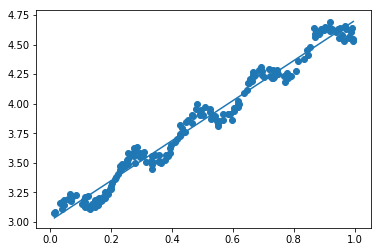

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
#print(repr(xMat[:, 1])) 
#print(repr(xMat[:, 1].flatten()))  #flatten函数让列矩阵会变成行矩阵，但是如果是矩阵形式，取[0]后形状仍然是(x,y),
                                        #而如果是数组形式，取[0]后形状就变成了(x,)←画图需要这种形状
ax.scatter(xMat[:, 1].flatten().A[0], yMat.T[:, 0].flatten().A[0])
xCopy = xMat.copy()
xCopy.sort(0)  #需要排序，否则画图会出错
yHat = xCopy * ws
ax.plot(xCopy[:, 1], yHat)


### 返回皮尔逊积矩相关系数

In [5]:
corrcoef(yHat.T, yMat)

array([[1.        , 0.13653777],
       [0.13653777, 1.        ]])

In [69]:
def lwlr(testPoint, xArr, yArr, k=1.0):
    '''
    返回预测值，矩阵形式，一个值
    '''
    xMat = mat(xArr)
    yMat = mat(yArr).T
    m = xMat.shape[0]
    weights = mat(eye((m)))
    for j in range(m):
        diffMat = testPoint - xMat[j, :] 
        weights[j ,j] = exp(diffMat * diffMat.T / (-2.0 * k ** 2))
    xTx = xMat.T * weights * xMat
    if linalg.det(xTx) == 0.0:
        print('奇异矩阵，不能求逆')
        return
    ws = xTx.I * xMat.T * weights * yMat
    return testPoint * ws

def lwlrTest(testArr, xArr, yArr, k=1.0):
    '''
    返回行数组,形状是(x,)
    '''
    m = shape(testArr)[0]  ##这里注意，list没有shape属性。但是用shape(list)就可以
    yHat = zeros((m))
    for i in range(m):
        yHat[i] = lwlr(testArr[i], xArr, yArr, k)
    return yHat

In [77]:
print(xArr)
print(type(xArr))
print(shape(xArr))
print(yArr)
print(type(yArr))
print(shape(yArr))

[[1.0, 0.067732], [1.0, 0.42781], [1.0, 0.995731], [1.0, 0.738336], [1.0, 0.981083], [1.0, 0.526171], [1.0, 0.378887], [1.0, 0.033859], [1.0, 0.132791], [1.0, 0.138306], [1.0, 0.247809], [1.0, 0.64827], [1.0, 0.731209], [1.0, 0.236833], [1.0, 0.969788], [1.0, 0.607492], [1.0, 0.358622], [1.0, 0.147846], [1.0, 0.63782], [1.0, 0.230372], [1.0, 0.070237], [1.0, 0.067154], [1.0, 0.925577], [1.0, 0.717733], [1.0, 0.015371], [1.0, 0.33507], [1.0, 0.040486], [1.0, 0.212575], [1.0, 0.617218], [1.0, 0.541196], [1.0, 0.045353], [1.0, 0.126762], [1.0, 0.556486], [1.0, 0.901144], [1.0, 0.958476], [1.0, 0.274561], [1.0, 0.394396], [1.0, 0.87248], [1.0, 0.409932], [1.0, 0.908969], [1.0, 0.166819], [1.0, 0.665016], [1.0, 0.263727], [1.0, 0.231214], [1.0, 0.552928], [1.0, 0.047744], [1.0, 0.365746], [1.0, 0.495002], [1.0, 0.493466], [1.0, 0.792101], [1.0, 0.76966], [1.0, 0.251821], [1.0, 0.181951], [1.0, 0.808177], [1.0, 0.334116], [1.0, 0.33863], [1.0, 0.452584], [1.0, 0.69477], [1.0, 0.590902], [1.0

In [83]:
lwlr(xArr[0], xArr, yArr, 1.0)

matrix([[3.12204471]])

In [72]:
lwlr(xArr[0], xArr, yArr, 0.001)

matrix([[3.20175729]])

In [81]:
yHat = lwlrTest(xArr, xArr, yArr, 0.1)
print(yHat)
print(type(yHat))
print(shape(yHat))
print(shape(yHat.T))

[3.14971201 3.72900133 4.63630691 4.27070271 4.62994241 3.89713164
 3.64442421 3.12383051 3.22569271 3.23375663 3.42112184 4.11106283
 4.25831517 3.40164087 4.62288421 4.03764101 3.60989382 3.2482244
 4.09215715 3.39011695 3.1519663  3.1491991  4.57864059 4.23482271
 3.11264708 3.57019624 3.12828104 3.35829978 4.05502756 3.92258965
 3.13172356 3.21714437 3.94864482 4.54505554 4.61398242 3.46786051
 3.67110151 4.50046919 3.69798483 4.5563555  3.27871494 4.14130617
 3.44907333 3.39162048 3.94256339 3.13347204 3.62198828 3.84438747
 3.8417812  4.36387999 4.32501649 3.42820363 3.30433993 4.39167433
 3.56859482 3.57617521 3.7718675  4.19445457 4.00828198 3.52463471
 3.24902781 4.20753829 4.24147777 4.14467275 3.21460531 4.05694353
 3.64819444 3.6560211  4.33803495 3.20273091 3.20194621 4.13859291
 3.43359422 4.6356797  3.50353664 4.60858874 3.52315147 3.47251227
 3.47567563 3.29367881 3.2616833  4.26171693 4.46009136 4.32765677
 3.7319188  3.27106458 4.56753034 3.53659745 3.33853268 3.50625

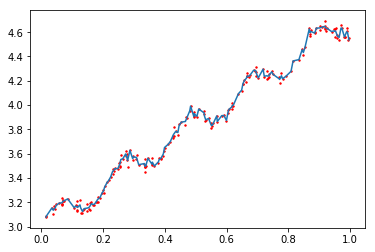

In [10]:
#这一块用来画图，可以当做一个函数
xMat = mat(xArr)
srtInd = xMat[:, 1].argsort(0)
xSort = xMat[srtInd][:, 0, :]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xSort[:, 1], yHat[srtInd])
ax.scatter(xMat[:, 1].flatten().A[0], yMat.T.flatten().A[0], s=2, c='red')

## 预测鲍鱼年龄

In [11]:
def rssError(yArr, yHatArr):
    return ((yArr - yHatArr) ** 2.0) .sum()

In [12]:
abX, abY = loadDataSet('abalone.txt')

In [86]:
yHat01 = lwlrTest(abX[0:99], abX[0:99], abY[0:99], 0.1)
yHat1 = lwlrTest(abX[0:99], abX[0:99], abY[0:99], 1)
yHat10 = lwlrTest(abX[0:99], abX[0:99], abY[0:99], 10)

In [88]:
print(rssError(abY[0:99], yHat01))
print(rssError(abY[0:99], yHat1))
print(rssError(abY[0:99], yHat10))

56.81549669032892
429.8905618702056
549.1181708826584


###   以下结果k取1和10的时候，误差和书上相同，取0.1就和书上相差很大  p145

In [127]:
def lwlr(testPoint,xArr,yArr,k=1.0):
    xMat = mat(xArr); yMat = mat(yArr).T
    m = shape(xMat)[0]
    weights = mat(eye((m)))
    for j in range(m):                      #next 2 lines create weights matrix
        diffMat = testPoint - xMat[j,:]     #
        weights[j,j] = exp(diffMat*diffMat.T/(-2.0*k**2))
    xTx = xMat.T * (weights * xMat)
    if linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws

def lwlrTest(testArr,xArr,yArr,k=1.0):  #loops over all the data points and applies lwlr to each one
    m = shape(testArr)[0]
    yHat = zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i],xArr,yArr,k)
    return yHat

In [128]:
def lwlrxxxxxxxx(testPoint, xArr, yArr, k=1.0):
    '''
    返回预测值，矩阵形式，一个值
    '''
    xMat = mat(xArr)
    yMat = mat(yArr).T
    m = shape(xMat)[0]
    weights = mat(eye((m)))
    for j in range(m):
        diffMat = testPoint - xMat[j, :] 
        weights[j ,j] = exp(diffMat * diffMat.T / (-2.0 * k ** 2))
    xTx = xMat.T * weights * xMat  #这里没有添加括号
    if linalg.det(xTx) == 0.0:
        print('奇异矩阵，不能求逆')
        return
    ws = xTx.I * xMat.T * weights * yMat  #这里没有添加括号
    return testPoint * ws

def lwlrTestxxxxxxx(testArr, xArr, yArr, k=1.0):
    '''
    返回行数组,形状是(x,)
    '''
    m = shape(testArr)[0]  
    yHat = zeros(m)
    for i in range(m):
        yHat[i] = lwlrxxxxxxxx(testArr[i], xArr, yArr, k)
    return yHat

## 这个地方要超级注意，我比对了半天，最终发现是因为括号！！！！！
## 矩阵运算就算先后顺序一样，加了括号结果也会不一样！！！！！！
## 很巧的是就0.1出现了大的错误，k取其他值误差结果基本和书上一样！！！！
## 详情看下面对比

In [129]:
yHat01 = lwlrTest(abX[100:199], abX[0:99], abY[0:99], 0.1)
print(yHat01)
print(rssError(abY[100:199], yHat01))

[  7.6797586    8.54088168  11.60818302   9.4653089   10.7486784
   9.01133495  10.07827028  11.24803291  10.2005939    3.80888833
   6.48750884   9.28728759   4.77263605  11.90082977  11.78085327
   8.81353682  12.02194874   9.53661134  14.76918673   7.30716339
   7.37574709   6.09302207  11.33495456   7.22014561   3.73300219
   5.48044416   7.56878179   5.58669479  10.5650303  -11.974
  16.06639358  10.53760126  19.59406897   8.49206092   5.17689339
   9.83748458  18.87796175   5.74534334  10.68544675  10.30899728
   7.54853702   6.60508212  12.12473984   8.41176702   8.21639017
   8.6427194   10.21387014   7.18571033   2.55059494   3.64308604
   9.86770181  14.76192007   9.5294734   11.61300972  20.94459413
  11.56547256  10.82540062   0.99557461   9.83285543  13.4275699
  13.46728567  13.1942776   12.05656009 -34.752      -37.38976813
 117.464        5.812      -28.37074219  -2.908      -46.51330027
  13.56        16.11175752  11.35981737  15.55443652   4.97178103
   8.33338846   8

In [133]:
yHat01xxx = lwlrTestxxxxxxx(abX[100:199], abX[0:99], abY[0:99], 0.1)
print(yHat01xxx)
print(rssError(abY[100:199], yHat01xxx.T))

[   7.6797586     8.54088168   11.60818302    9.4653089    10.7486784
    9.01133495   10.07827028   11.24803291   10.2005939     3.80888833
    6.48750884    9.28728759    4.77263605   11.90082977   11.78085327
    8.81353682   12.02194874    9.53661134   14.76918673    7.30716339
    7.37574709    6.09302207   11.33495456    7.22014561    3.73300219
    5.48044416    7.56878179    5.58669479   10.5648306    38.12508639
   16.06639358   10.53760126   19.59406897    8.49206092    5.17689339
    9.83748458   18.87796176    5.74534334   10.68544675   10.30899728
    7.54853702    6.60508212   12.12473984    8.41176702    8.21639017
    8.6427194    10.21387014    7.18571033    2.55059494    3.64308604
    9.86770181   14.76192007    9.5294734    11.61300972   20.94459413
   11.56547256   10.82540062    0.99557454    9.83285543   13.4275699
   13.46728567   13.1942776    12.05656009   35.38748664  -37.39352752
 -129.14991004   41.93753118  -28.27622611   68.41836262  -46.51329948
  -62.02

In [135]:
yHat1xxxxxxx = lwlrTestxxxxxxx(abX[100:199], abX[0:99], abY[0:99], 1)
rssError(abY[100:199], yHat1xxxxxxx.T)

573.5261441898057

In [134]:
yHat1 = lwlrTest(abX[100:199], abX[0:99], abY[0:99], 1)
rssError(abY[100:199], yHat1.T)

573.5261441895706

In [103]:
yHat10 = lwlrTest(abX[100:199], abX[0:99], abY[0:99], 10)
rssError(abY[100:199], yHat10.T)

517.5711905381745

In [136]:
yHat10xxxxxxx = lwlrTestxxxxxxx(abX[100:199], abX[0:99], abY[0:99], 10)
rssError(abY[100:199], yHat10xxxxxxx.T)

517.5711905382693

In [92]:
ws = standRegres(abX[0:99], abY[0:99])
yHat = mat(abX[100:199]) * ws
rssError(array(abY[100:199]), yHat.T.A)

518.6363153250693

## 岭回归

In [17]:
def ridgeRegres(xMat, yMat, lam=0.2):
    xTx = xMat.T * xMat
    denom = xTx + eye((xMat.shape[1])) * lam
    if linalg.det(denom) == 0.0:
        print('矩阵为奇异矩阵，不能求逆')
        return 
    ws = denom.I * xMat.T * yMat  #ws是列向量
    return ws

In [18]:
def ridgeTest(xArr, yArr):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    yMean = mean(yMat, 0)
    yMat = yMat - yMean
    xMeans = mean(xMat, 0)
    xVar = var(xMat, 0)
    xMat = (xMat - xMeans) / xVar
    numTestPts = 30
    wMat = zeros((numTestPts, xMat.shape[1]))
    for i in range(numTestPts):
        ws = ridgeRegres(xMat, yMat, exp(i-10))
        wMat[i, :] = ws.T  #每一个lam对应一行ws
    return wMat

In [19]:
abX, abY = loadDataSet('abalone.txt')
ridgeWeights = ridgeTest(abX, abY)

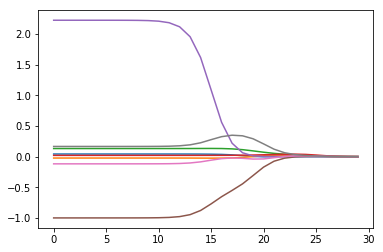

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ridgeWeights)

## 选择合适的lam就要用交叉验证

# 与lasso效果差不多的前向逐步回归算法

In [21]:
def stageWise(xArr, yArr, eps=0.01, numIt=100):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    yMean = mean(yMat, 0)
    yMat = yMat - yMean
    xMat = (xMat - mean(xMat, 0)) / var(xMat, 0)
    m, n = xMat.shape
    returnMat = zeros((numIt, n))
    ws = zeros((n, 1))
    wsTest = ws.copy()
    wsMax = ws.copy()
    for i in range(numIt):
        print(ws.T)
        lowestError = inf
        for j in range(n):
            for sign in [-1, 1]:
                wsTest = ws.copy()
                wsTest[j] += eps * sign
                yTest = xMat * wsTest
                rssE = rssError(yMat.A, yTest.A)
                if rssE < lowestError:
                    lowestError = rssE
                    wsMax = wsTest
        ws = wsMax.copy()
        returnMat[i, :] = ws.T
    return returnMat

In [22]:
xArr, yArr = loadDataSet('abalone.txt')
stageWise(xArr, yArr, 0.01, 200)

[[0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.   0.   0.   0.01 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.02 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.03 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.04 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.05 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.06 0.   0.   0.   0.  ]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.  ]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.01]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.02]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.03]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.04]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.05]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.06]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.07]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.08]]
[[0.   0.   0.01 0.05 0.   0.   0.   0.08]]
[[0.   0.   0.01 0.05 0.   0.   0.   0.09]]
[[0.   0.   0.01 0.05 0.   0.   0.   0.1 ]]
[[0.   0.   0.01 0.05 0.   0.   0.   0.11]]
[[ 0.    0.    0.01  0.05  0.   -0.01  0.    0.11]]
[[ 0.    0.    0.01  0.05  0.   -0.02  0.    0.11]]
[[ 0.    0.    0.01  0.05  0.   

[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0. 

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.04,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36]])

##  看到那些参数为0的特征，很可能表明这些特征没用，这算是这个算法的优点，及时停止对不重要特征的搜集

# 【预测乐高玩具套装价格】

In [23]:
from bs4 import BeautifulSoup
import random

def scrapePage(retX, retY, inFile, yr, numPce, origPrc):
    
    # 打开并读取HTML文件
    with open(inFile, encoding='utf-8') as f:
        html = f.read()
    soup = BeautifulSoup(html)

    i = 1
    # 根据HTML页面结构进行解析
    currentRow = soup.find_all('table', r = "%d" % i)

    while(len(currentRow) != 0):
        currentRow = soup.find_all('table', r = "%d" % i)
        title = currentRow[0].find_all('a')[1].text
        lwrTitle = title.lower()
        # 查找是否有全新标签
        if (lwrTitle.find('new') > -1) or (lwrTitle.find('nisb') > -1):
            newFlag = 1.0
        else:
            newFlag = 0.0

        # 查找是否已经标志出售，我们只收集已出售的数据
        soldUnicde = currentRow[0].find_all('td')[3].find_all('span')
        if len(soldUnicde) == 0:
            print("商品 #%d 没有出售" % i)
        else:
            # 解析页面获取当前价格
            soldPrice = currentRow[0].find_all('td')[4]
            priceStr = soldPrice.text
            priceStr = priceStr.replace('$','') 
            priceStr = priceStr.replace(',','')
            if len(soldPrice) > 1:
                priceStr = priceStr.replace('Free shipping', '')
            sellingPrice = float(priceStr)

            # 去掉不完整的套装价格
            if  sellingPrice > origPrc * 0.5:
                print("%d\t%d\t%d\t%f\t%f" % (yr, numPce, newFlag, origPrc, sellingPrice))
                retX.append([yr, numPce, newFlag, origPrc])
                retY.append(sellingPrice)
        i += 1
        currentRow = soup.find_all('table', r = "%d" % i)

def setDataCollect(retX, retY):
    scrapePage(retX, retY, './lego/lego8288.html', 2006, 800, 49.99)
    scrapePage(retX, retY, './lego/lego10030.html', 2002, 3096, 269.99)
    scrapePage(retX, retY, './lego/lego10179.html', 2007, 5195, 499.99)
    scrapePage(retX, retY, './lego/lego10181.html', 2007, 3428, 199.99)
    scrapePage(retX, retY, './lego/lego10189.html', 2008, 5922, 299.99)
    scrapePage(retX, retY, './lego/lego10196.html', 2009, 3263, 249.99)


In [24]:
lgX = []
lgY = []
setDataCollect(lgX,lgY)

C:\Users\Shanks\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Shanks\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


2006	800	0	49.990000	85.000000
2006	800	0	49.990000	102.500000
2006	800	0	49.990000	77.000000
商品 #4 没有出售
2006	800	0	49.990000	162.500000
2002	3096	0	269.990000	699.990000
2002	3096	0	269.990000	602.000000
2002	3096	0	269.990000	515.000000
2002	3096	0	269.990000	510.000000
2002	3096	0	269.990000	375.000000
2002	3096	1	269.990000	1050.000000
2002	3096	0	269.990000	740.000000
2002	3096	1	269.990000	759.000000
2002	3096	0	269.990000	730.000000
2002	3096	1	269.990000	750.000000
商品 #11 没有出售
2007	5195	0	499.990000	910.000000
2007	5195	1	499.990000	1199.990000
2007	5195	0	499.990000	811.880000
商品 #4 没有出售
2007	5195	0	499.990000	1324.790000
2007	5195	1	499.990000	850.000000
2007	5195	1	499.990000	800.000000
2007	5195	0	499.990000	810.000000
2007	5195	1	499.990000	1075.000000
2007	5195	0	499.990000	1050.000000
2007	5195	1	499.990000	1199.990000
2007	5195	0	499.990000	1342.310000
2007	5195	1	499.990000	1000.000000
2007	5195	0	499.990000	1780.000000
2007	5195	0	499.990000	750.000000
商品 #16 没有出售
200

In [25]:
shape(lgX)

(63, 4)

In [26]:
lgX1 = mat(ones((63,5)))
lgX1[:, 1:5] = mat(lgX)

In [27]:
lgX1[0, :]

matrix([[1.000e+00, 2.006e+03, 8.000e+02, 0.000e+00, 4.999e+01]])

In [28]:
print(shape(lgX[0]))
print(shape(lgY))

(4,)
(63,)


In [29]:
ws = standRegres(lgX1, lgY)
ws

matrix([[ 5.53199701e+04],
        [-2.75928219e+01],
        [-2.68392234e-02],
        [-1.12208481e+01],
        [ 2.57604055e+00]])

In [30]:
print(type(lgX1))
print(type(ws))
lgX1[0] * ws

<class 'numpy.matrixlib.defmatrix.matrix'>
<class 'numpy.matrixlib.defmatrix.matrix'>


matrix([[76.07418835]])

In [31]:
def crossValidation(xArr, yArr, numVal=10):
    m = len(yArr)
    indexList = list(range(m))
    errorMat = zeros((numVal, 30))
    for i in range(numVal):
        trainX = []
        trainY = []
        testX = []
        testY = []
        random.shuffle(indexList)
        for j in range(m):
            if j < m * 0.9:
                trainX.append(xArr[indexList[j]])
                trainY.append(yArr[indexList[j]])
            else:
                testX.append(xArr[indexList[j]])
                testY.append(yArr[indexList[j]])
        wMat = ridgeTest(trainX, trainY)
        for k in range(30):
            matTestX = mat(testX)
            matTrainX = mat(trainX)
            meanTrain = mean(matTrainX, 0)
            varTrain = var(matTrainX, 0)
            matTestX = (matTestX - meanTrain) / varTrain  #用训练数据参数把测试数据标准化
            yEst = matTestX * mat(wMat[k, :]).T + mean(testY)
            errorMat[i, k] = rssError(yEst.T.A, array(testY))
    meanErrors = mean(errorMat, 0)
    minMean = float(min(meanErrors))
    bestWeights = wMat[nonzero(meanErrors == minMean)]
    xMat = mat(xArr)
    yMat = mat(yArr).T
    meanX = mean(xMat, 0)
    varX = var(xMat, 0)
    unReg = bestWeights / varX
    print('The best model from Ridge Regression is: {}'.format(unReg))
    print('with constant term: {}'.format(-1 * sum(multiply(meanX, unReg)) + mean(yMat)))

In [32]:
crossValidation(lgX, lgY, 10)

The best model from Ridge Regression is: [[-1.96881824e+01  8.08230063e-04 -2.42162820e+01  1.87563885e+00]]
with constant term: 39579.52980338812


In [33]:
ridgeTest(lgX, lgY)

array([[-1.45288906e+02, -8.39360442e+03, -3.28682450e+00,
         4.42362406e+04],
       [-1.46649725e+02, -1.89952152e+03, -2.80638599e+00,
         4.27891633e+04],
       [-1.44450432e+02,  8.55488076e+02, -1.35089285e+00,
         4.00885735e+04],
       [-1.37402474e+02,  1.64217093e+03,  1.95840783e+00,
         3.44932120e+04],
       [-1.24750588e+02,  1.44326171e+03,  7.62540167e+00,
         2.50647592e+04],
       [-1.10234679e+02,  8.81842164e+02,  1.40617304e+01,
         1.43874420e+04],
       [-9.96484167e+01,  4.17805568e+02,  1.87140361e+01,
         6.66770425e+03],
       [-9.40345090e+01,  1.71289137e+02,  2.10844952e+01,
         2.71206176e+03],
       [-9.11400659e+01,  6.57287394e+01,  2.20487105e+01,
         1.03800465e+03],
       [-8.86246985e+01,  2.45452725e+01,  2.23181664e+01,
         3.87564774e+02],
       [-8.41447674e+01,  9.05861459e+00,  2.21495534e+01,
         1.43313895e+02],
       [-7.44804291e+01,  3.31863501e+00,  2.14607512e+01,
      